In [1]:
import pandas as pd
import numpy as np
train_df = pd.read_csv(r"C:\Users\kaand\Desktop\Github Repositories\Prediction-of-Diabetes-Mellitus-Disease\TrainingWiDS2021.csv")
test_df = pd.read_csv(r"C:\Users\kaand\Desktop\Github Repositories\Prediction-of-Diabetes-Mellitus-Disease\UnlabeledWiDS2021.csv")
info = pd.read_csv(r"C:\Users\kaand\Desktop\Github Repositories\Prediction-of-Diabetes-Mellitus-Disease\DataDictionaryWiDS2021.csv")

# 1. First Look At The Dataset


In [2]:
train_df.head()

,Unnamed: 0,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,...,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
0,1,214826,118,68.0,22.732803,0,Caucasian,M,180.3,Floor,...,NaN,NaN,0,0,0,0,0,0,0,1
1,2,246060,81,77.0,27.421875,0,Caucasian,F,160.0,Floor,...,51.0,51.0,0,0,0,0,0,0,0,1
2,3,276985,118,25.0,31.952749,0,Caucasian,F,172.7,Emergency Department,...,NaN,NaN,0,0,0,0,0,0,0,0
3,4,262220,118,81.0,22.635548,1,Caucasian,F,165.1,Operating Room,...,337.0,337.0,0,0,0,0,0,0,0,0
4,5,201746,33,19.0,NaN,0,Caucasian,M,188.0,NaN,...,NaN,NaN,0,0,0,0,0,0,0,0


In [3]:
test_df.head()

,Unnamed: 0,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,...,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
0,1,144740,10141,72,NaN,0,Caucasian,F,152.4,Floor,...,NaN,NaN,NaN,0,0,0,0,0,0,0
1,2,141990,10141,86,NaN,0,Caucasian,F,175.3,Emergency Department,...,NaN,NaN,NaN,0,0,0,0,0,0,0
2,3,142038,10141,72,NaN,0,Caucasian,F,162.6,Floor,...,NaN,NaN,NaN,0,0,0,0,0,0,0
3,4,138628,10141,66,NaN,0,Caucasian,M,177.8,Floor,...,NaN,NaN,NaN,0,0,0,0,0,0,0
4,5,141682,10141,89,NaN,0,Caucasian,M,170.2,Direct Admit,...,NaN,NaN,NaN,0,0,0,0,0,0,0


In [4]:
train_df = train_df.drop(columns=['Unnamed: 0'])   #Unnamed 0 feature is unnecessary, hence we can drop this column.
test_df = test_df.drop(columns=['Unnamed: 0'])

In [12]:
print("train_df.shape",train_df.shape,"\ntest_df.shape",test_df.shape)

train_df.shape (130157, 180) 
test_df.shape (10234, 179)


In [6]:
desc = train_df.describe().T
desc

,count,mean,std,min,25%,50%,75%,max
encounter_id,130157.0,213000.856519,38109.828146,147000.000000,180001.000000,213014.000000,246002.000000,279000.00000
hospital_id,130157.0,106.102131,63.482277,1.000000,49.000000,112.000000,165.000000,204.00000
age,125169.0,61.995103,16.822880,0.000000,52.000000,64.000000,75.000000,89.00000
bmi,125667.0,29.110260,8.262776,14.844926,23.598006,27.564749,32.803127,67.81499
elective_surgery,130157.0,0.189840,0.392176,0.000000,0.000000,0.000000,0.000000,1.00000
...,...,...,...,...,...,...,...,...
immunosuppression,130157.0,0.025669,0.158146,0.000000,0.000000,0.000000,0.000000,1.00000
leukemia,130157.0,0.007307,0.085166,0.000000,0.000000,0.000000,0.000000,1.00000
lymphoma,130157.0,0.004187,0.064574,0.000000,0.000000,0.000000,0.000000,1.00000
solid_tumor_with_metastasis,130157.0,0.020852,0.142888,0.000000,0.000000,0.000000,0.000000,1.00000


In [7]:
info.head()

,Category,Variable Name,Unit of Measure,Data Type,Description,Example
0,identifier,encounter_id,None,integer,Unique identifier associated with a patient un...,None
1,identifier,hospital_id,None,integer,Unique identifier associated with a hospital,None
2,demographic,age,Years,numeric,The age of the patient on unit admission,None
3,demographic,bmi,kilograms/metres^2,string,The body mass index of the person on unit admi...,21.5
4,demographic,elective_surgery,None,binary,Whether the patient was admitted to the hospit...,0


In [8]:
np.unique(np.array([train_df[i].dtype for i in train_df.columns])) #Checking all datatypes in the dataframe 

array([dtype('int64'), dtype('float64'), dtype('O')], dtype=object)

In [9]:
dt_i=[]  
dt_fl=[]
dt_o=[]

#making a list of columns depending on the datatype
for col in train_df.columns:
    x=train_df[col].dtype
    if x=='int64':
        dt_i.append(col)         #integer datatype
    elif x=='float64':
        dt_fl.append(col)        #float datatype
    else:
        dt_o.append(col)         #object datatype
print("Columns with Integer Datatype:\n{}\n****\nColumns with Float Datatype:\n{}\n****\nColumns with Object Datatype:\n{}".format(dt_i,dt_fl,dt_o))

Columns with Integer Datatype:
['encounter_id', 'hospital_id', 'elective_surgery', 'icu_id', 'readmission_status', 'apache_post_operative', 'arf_apache', 'intubated_apache', 'ventilated_apache', 'aids', 'cirrhosis', 'hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma', 'solid_tumor_with_metastasis', 'diabetes_mellitus']
****
Columns with Float Datatype:
['age', 'bmi', 'height', 'pre_icu_los_days', 'weight', 'albumin_apache', 'apache_2_diagnosis', 'apache_3j_diagnosis', 'bilirubin_apache', 'bun_apache', 'creatinine_apache', 'fio2_apache', 'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_unable_apache', 'gcs_verbal_apache', 'glucose_apache', 'heart_rate_apache', 'hematocrit_apache', 'map_apache', 'paco2_apache', 'paco2_for_ph_apache', 'pao2_apache', 'ph_apache', 'resprate_apache', 'sodium_apache', 'temp_apache', 'urineoutput_apache', 'wbc_apache', 'd1_diasbp_invasive_max', 'd1_diasbp_invasive_min', 'd1_diasbp_max', 'd1_diasbp_min', 'd1_diasbp_noninvasive_max', 'd1_diasbp_noninvasive

# 2. Missing Values

In [10]:
train_df.isnull().sum().sort_values(ascending = False)

h1_bilirubin_min     119861
h1_bilirubin_max     119861
h1_albumin_min       119005
h1_albumin_max       119005
h1_lactate_max       118467
                      ...  
hepatic_failure           0
immunosuppression         0
leukemia                  0
lymphoma                  0
encounter_id              0
Length: 180, dtype: int64

In [11]:
test_df.isnull().sum().sort_values(ascending = False)

h1_lactate_max       9421
h1_lactate_min       9421
h1_bilirubin_max     9407
h1_bilirubin_min     9407
h1_albumin_min       9365
                     ... 
cirrhosis               0
hepatic_failure         0
immunosuppression       0
leukemia                0
encounter_id            0
Length: 179, dtype: int64

In [13]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


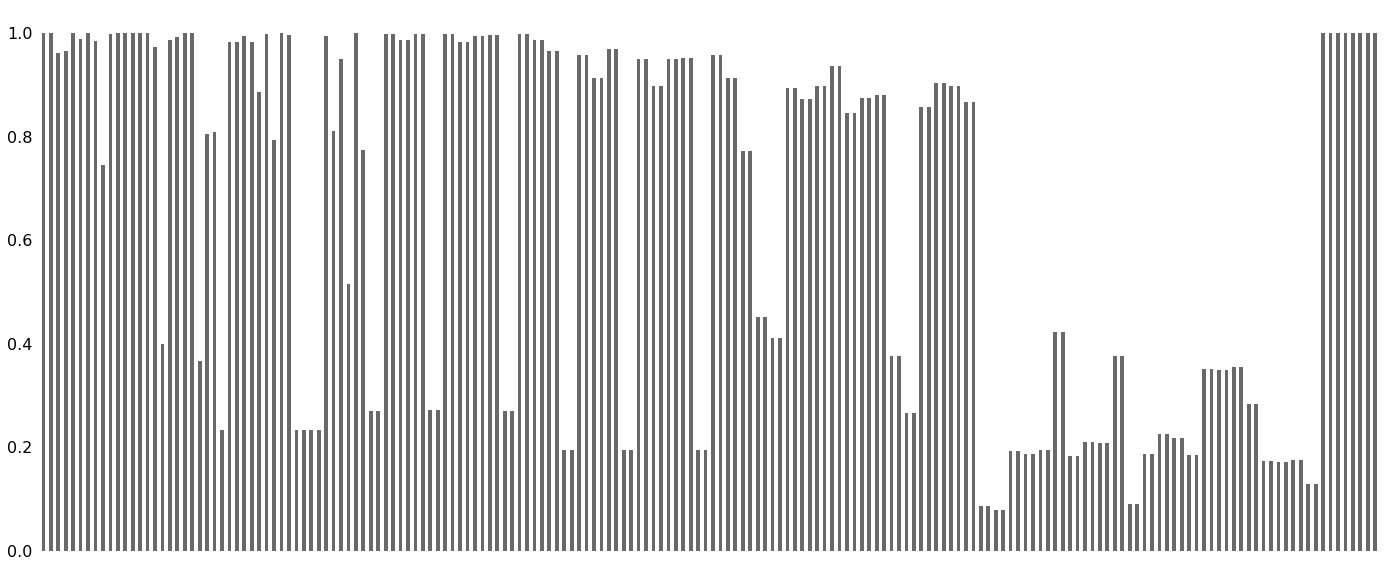

In [14]:
import missingno as msno 
msno.bar(train_df);

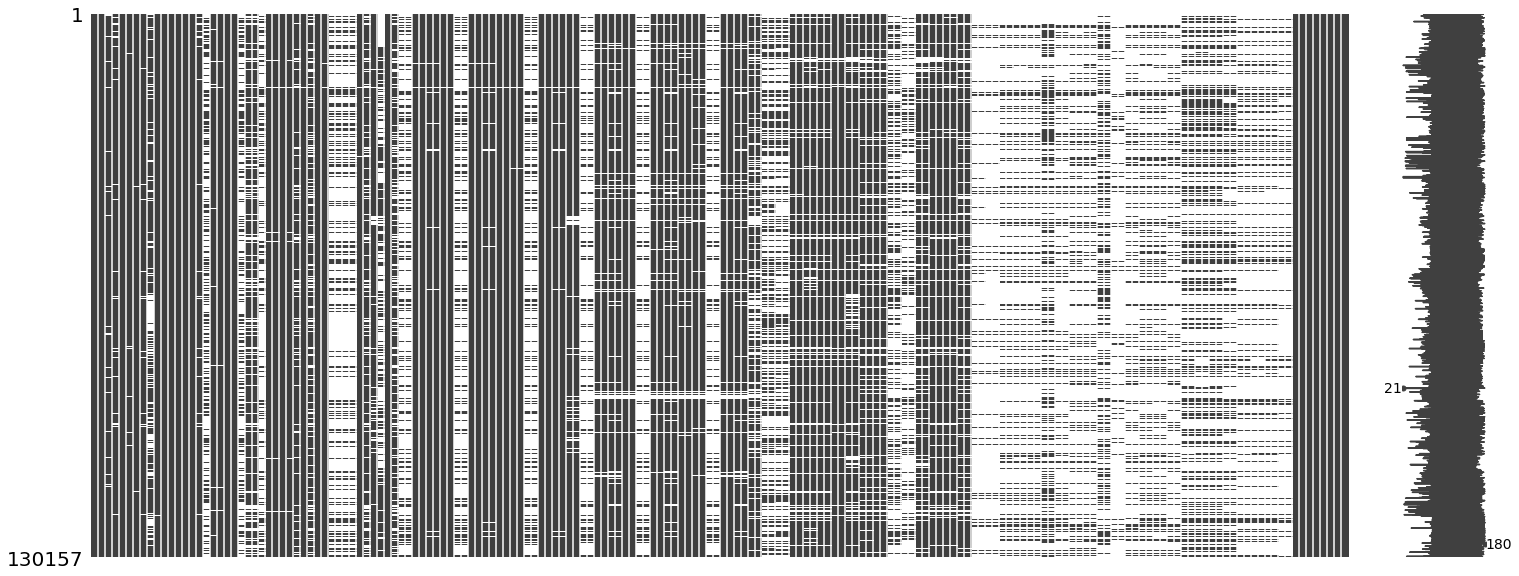

In [15]:
msno.matrix(train_df)

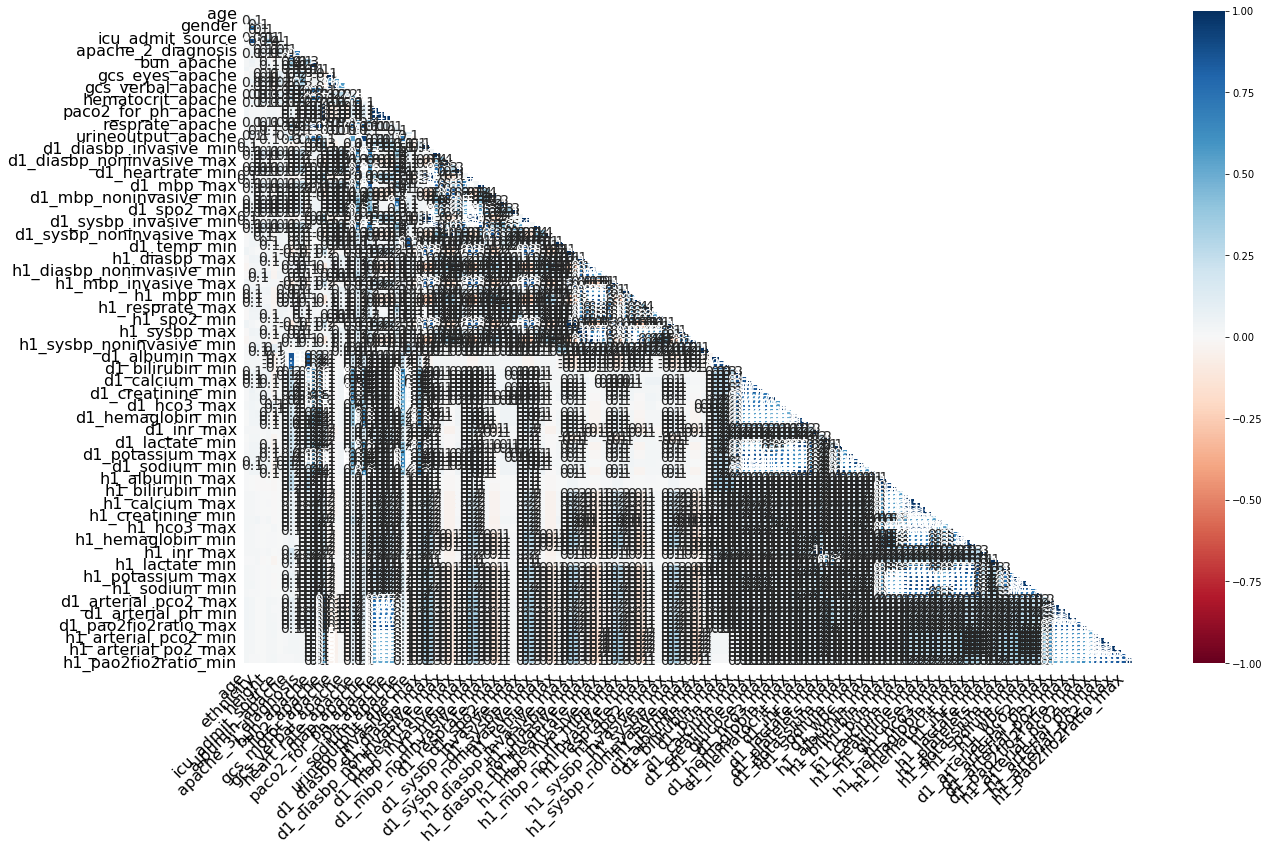

In [16]:
msno.heatmap(train_df)